In [1]:
import numpy as np
import re
import gensim.downloader as api
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Exercises 1: Implement TF-IDF without using any TF-IDF library

In [2]:
# read data
documents = []
with open('../lecture1/text.txt') as data:
    for line in data:
        if line == '\n':
            continue
        documents.append(line.strip())            

In [3]:
documents

['Could better news coverage have helped prevent the killing of George Floyd?',
 'The urgent and long overdue public discussions about how to end police brutality and dismantle the prison-industrial complex should include deliberation about our news media. Censored News on Policing and Prisons presents independent news dispatches and research articles on police violence and the prison-industrial complex, as highlighted and analyzed by Project Censored.',
 'Project Censored originally covered each of the stories included here partly because they extend beyond the corporate news media’s narrow definitions of who and what are newsworthy—and that is what we mean when we identify these stories as “censored” news. Taken together, the readings collected here suggest that corporate news media have done a poor job of informing the American public about long-term, systemic problems with American policing and prisons.',
 'Project Censored offers the readings here in hopes of promoting and informi

$$tf(t, d) = \frac{f_{t, d}}{\sum_{t' \in d}{f_{t', d}}}$$

$$idf(t, D) = log\left(\frac{N}{|{d \in D: t \in d}|}\right)$$

$$tfidf(t, d, D) = tf(t, d)  * idf(t, D)$$


In [4]:
# Tính TF của một từ trong một tài liệu
def compute_tf(word, document):
    words = document.split()  # Tách tài liệu thành các từ
    word_count = words.count(word)  # Đếm số lần từ xuất hiện trong tài liệu
    tf = word_count / len(words)  # Tính TF
    return tf

# Tính IDF cho một từ trong tập dữ liệu
def compute_idf(word, documents):
    num_documents_containing_word = sum(1 for document in documents if word in document)  # Đếm số tài liệu chứa từ
    idf = np.log(len(documents) / (num_documents_containing_word + 1))  # Tính IDF
    return idf

# Tính TF-IDF cho một từ trong một tài liệu
def compute_tf_idf(word, document, documents):
    tf = compute_tf(word, document) # Tính TF
    idf = compute_idf(word, documents) # Tính IDF
    tf_idf = tf * idf # Tính TF-IDF
    return tf_idf

In [5]:
def get_word_set(documents):
    word_set = set()
    for document in documents:
        words = re.split('\W+', document) 
        word_set.update(words)
    word_set.remove('')
    
    return word_set


In [6]:
# Tạo danh sách các từ trong từ điển trong bộ dữ liệu đầu vào
word_set = get_word_set(documents)
len(word_set), word_set

(114,
 {'American',
  'Censored',
  'Could',
  'Floyd',
  'George',
  'News',
  'Policing',
  'Prisons',
  'Project',
  'Taken',
  'The',
  'a',
  'about',
  'analyzed',
  'and',
  'are',
  'articles',
  'as',
  'because',
  'belief',
  'better',
  'beyond',
  'brutality',
  'by',
  'censored',
  'collected',
  'complex',
  'confronting',
  'conversation',
  'corporate',
  'coverage',
  'covered',
  'deeper',
  'definitions',
  'deliberation',
  'discussions',
  'dismantle',
  'dismantling',
  'dispatches',
  'done',
  'each',
  'economic',
  'end',
  'ending',
  'extend',
  'have',
  'helped',
  'here',
  'highlighted',
  'history',
  'hopes',
  'how',
  'identify',
  'in',
  'include',
  'included',
  'independent',
  'industrial',
  'inequality',
  'informing',
  'injustices',
  'is',
  'job',
  'killing',
  'long',
  'mean',
  'media',
  'narrow',
  'nation',
  'news',
  'newsworthy',
  'of',
  'offers',
  'on',
  'one',
  'originally',
  'our',
  'overdue',
  'partly',
  'police',

In [7]:
# Tạo ma trận TF-IDF
tf_idf_matrix = []
for document in documents:
    tf_idf_row = [compute_tf_idf(word, document, documents) for word in word_set] # Tính TF-TDF trong từng đoạn dữ liệu
    tf_idf_matrix.append(tf_idf_row)

In [8]:
tf_idf_matrix

[[0.0,
  0.0,
  0.0,
  0.057762265046662105,
  0.0,
  0.0,
  -0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.057762265046662105,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.057762265046662105,
  0.0,
  0.0,
  0.023973506037648404,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.01859529594285081,
  0.0,
  0.0,
  0.057762265046662105,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.057762265046662105,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.057762265046662105,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.0,
  0.0,
  0.0,
  0.057762265046662105,
  0.0,
  0.0],
 [0.0,
  0.013329753472306641,
  0.0,
  0.0,


# Exercises 2: Download word2vec using gensim library and play around with the library

In [9]:
import gensim.downloader as api
model = api.load("word2vec-google-news-300")
model.most_similar("cat")

[('cats', 0.8099379539489746),
 ('dog', 0.760945737361908),
 ('kitten', 0.7464985251426697),
 ('feline', 0.7326234579086304),
 ('beagle', 0.7150582671165466),
 ('puppy', 0.7075453400611877),
 ('pup', 0.6934291124343872),
 ('pet', 0.6891531348228455),
 ('felines', 0.6755931973457336),
 ('chihuahua', 0.6709762215614319)]

# Advanced exercise: Apply PCA to the word2vec you just downloaded and visualize it

In [10]:
# Lấy ra các từ tương tự với từ cat
word_similar = model.most_similar("cat")
keys_vector = [word[0] for word in word_similar]

In [12]:
# Biểu diễn các từ dưới dạng vector
word_vectors = np.array([model[word] for word in keys_vector])
word_vectors.shape

(10, 300)

In [13]:
# Dùng PCA để giảm kích thước xuống 2D
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)
word_vectors_2d.shape

(10, 2)

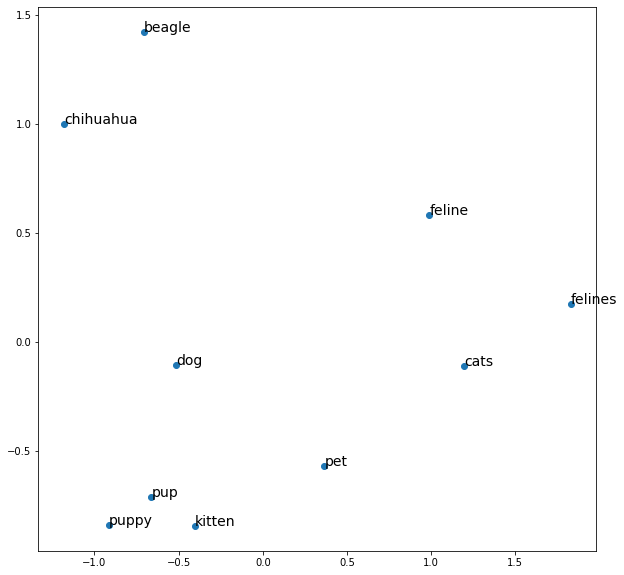

In [20]:
plt.figure(figsize=(10, 10))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], marker='o')

for i, word in enumerate(keys_vector):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=14)

plt.show()